In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../data/howpop_train.csv')

In [4]:
df.shape

(134137, 17)

In [5]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [6]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [8]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/220161/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [9]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [10]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [12]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [13]:
%config InlineBackend.figure_format = 'png'

### 1. В каком месяце (и какого года) было больше всего публикаций?
март 2016 <br/>
март 2015 <br/>
апрель 2015 <br/>
апрель 2016 <br/>

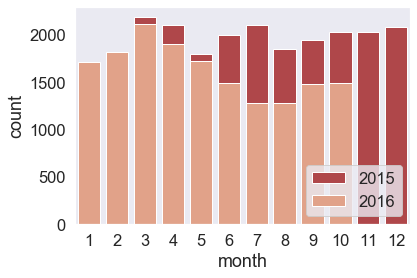

In [44]:
sns.countplot(x='month',data=df[df['year'].isin([2015,2016])],hue='year', dodge=False);
plt.legend(loc='lower right');
#март 2015

### 2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов: <br/>
 <br/>
Один или несколько дней сильно выделяются из общей картины <br/>
На хабре всегда больше статей, чем на гиктаймсе <br/>
По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей <br/>
Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :) <br/>

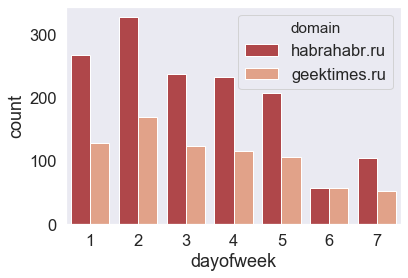

In [64]:
df_2 = df[(df['month']==3) & (df['year']==2015)]
sns.countplot(x='dayofweek',data=df_2,hue='domain');
#сб и вс - меньше постов, на хабре всегда больше, по субботам одинаково.

### 3. Когда лучше всего публиковать статью?
Больше всего просмотров набирают статьи, опубликованные в 12 часов дня<br/>
У опубликованных в 10 утра постов больше всего комментариев<br/>
Больше всего просмотров набирают статьи, опубликованные в 6 часов утра<br/>
Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера<br/>
На хабре дневные статьи комментируют чаще, чем вечерние<br/>

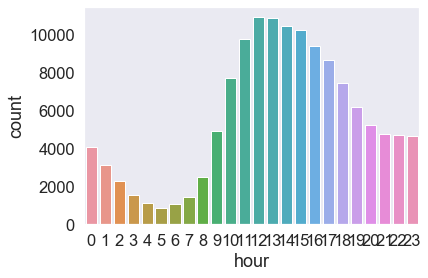

In [85]:
sns.countplot(x='hour',data=df);

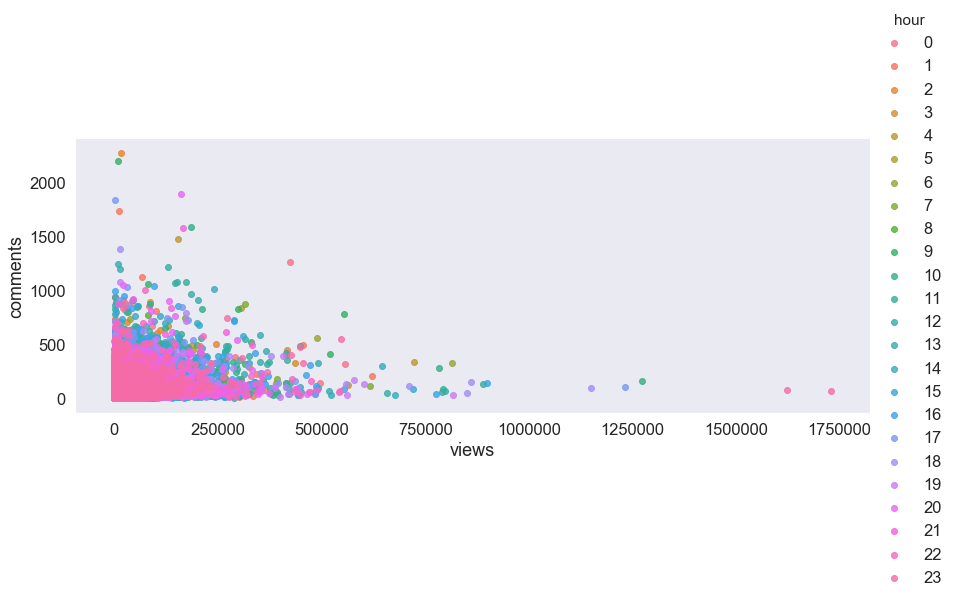

In [116]:
sns.lmplot(x='views',y='comments',data=df,hue='hour',fit_reg=False,aspect=2.5,legend=True);

### 4. Кого из топ-20 авторов чаще всего минусуют?
@Mordatyj <br/>
@Mithgol<br/>
@alizar<br/>
@ilya42<br/>

### 5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?